<a href="https://colab.research.google.com/github/kenithleon/computer-vison-prg/blob/main/Image_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

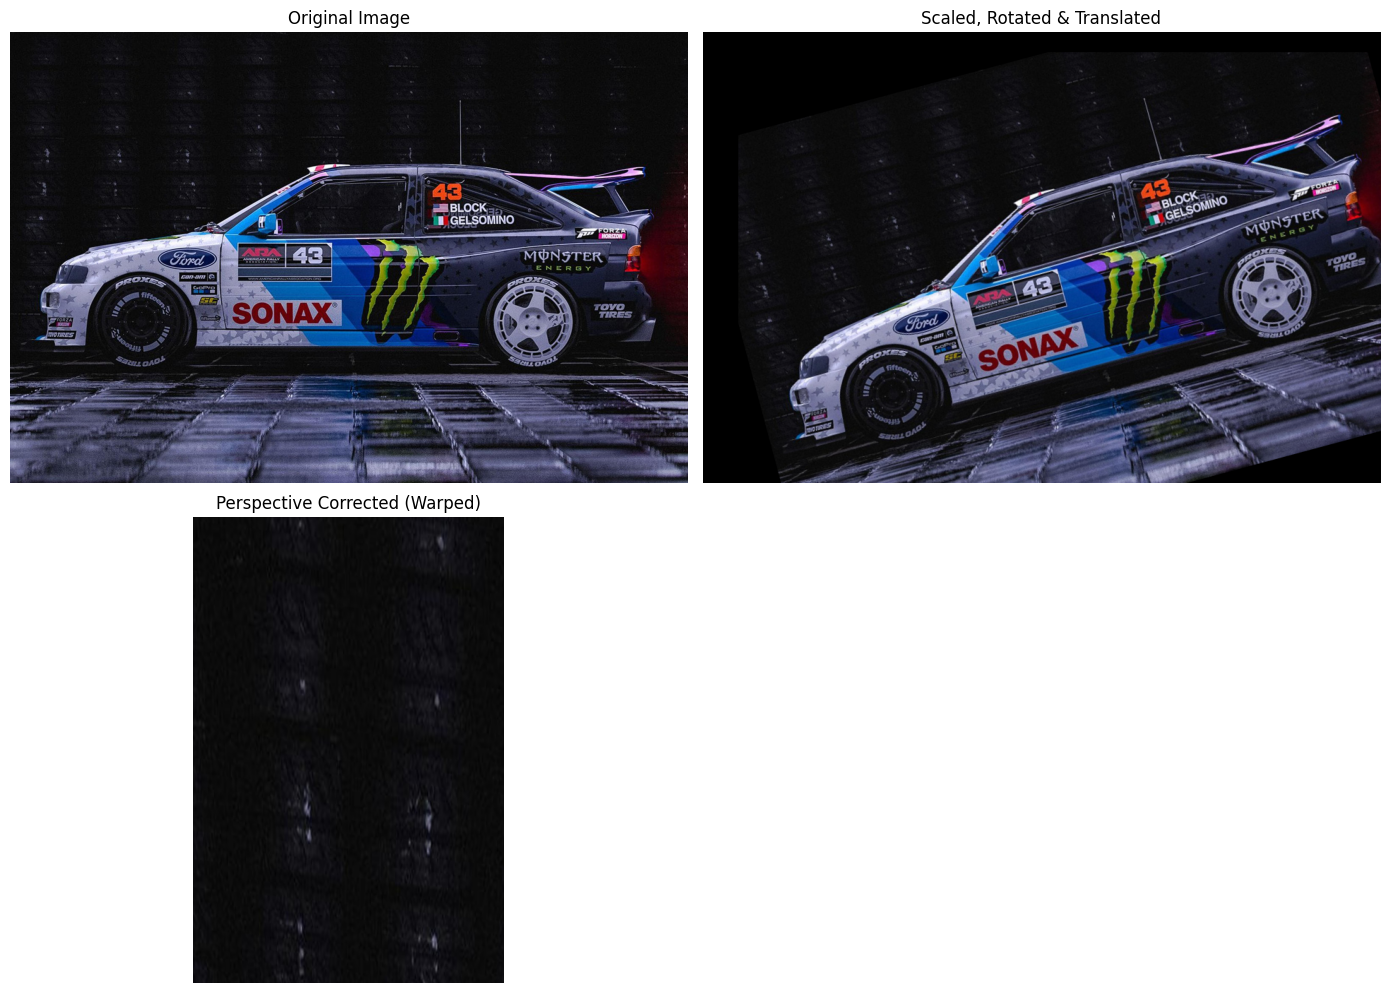

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# a. Load the image
image_path = '/content/wp11249668-1994-hoonigan-ford-escort-rs-cosworth-wrc-cossie-v2-wallpapers.jpg'  # ✅ Replace with your actual image path
img = cv2.imread(image_path)

# Check if image loaded successfully
if img is None:
    print("❌ Error: Image not found or failed to load.")
    exit()

# Keep a copy of original image
original = img.copy()

# Convert image to RGB for displaying using matplotlib
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# b. Apply basic transformations

# Scaling (60% of original size)
scaled_image = cv2.resize(image, None, fx=0.6, fy=0.6)

# Rotation (rotate 15 degrees)
(h, w) = scaled_image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle=15, scale=1.0)
rotated_image = cv2.warpAffine(scaled_image, rotation_matrix, (w, h))

# Translation (move right by 50 and down by 30)
tx, ty = 50, 30
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(rotated_image, translation_matrix, (w, h))

# c. Perspective Correction (you must adjust these points to match your image corners)
pts_src = np.float32([
    [120, 150],   # Top-left
    [500, 130],   # Top-right
    [530, 380],   # Bottom-right
    [100, 400]    # Bottom-left
])

# Output image size
width, height = 400, 600
pts_dst = np.float32([
    [0, 0],
    [width - 1, 0],
    [width - 1, height - 1],
    [0, height - 1]
])

# Perspective transformation
M = cv2.getPerspectiveTransform(pts_src, pts_dst)
warped_image = cv2.warpPerspective(original, M, (width, height))
warped_image = cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB)

# d. Visualization
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Scaled, Rotated & Translated')
plt.imshow(translated_image)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Perspective Corrected (Warped)')
plt.imshow(warped_image)
plt.axis('off')

plt.tight_layout()
plt.show()

